# ECON 441B - Modelling the Federal Reserve Funds Rate on the basis of the Taylor Rule

In [1]:
#Importing essential packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Importing the data from St.Louis FRED

In [4]:
#Importing data
data = pd.read_csv("C:/Users/prano/Downloads/Taylor Rule.csv", index_col=0)
#Setting index for the data
data.index = pd.to_datetime(data.index)
#Dropping NAs from the data
data = data.dropna()
print(data)
print(len(data.index))

            FedFunds  Unemployment  HousingStarts  Inflation
1959-01-01      2.48           6.0         1657.0     29.010
1959-02-01      2.43           5.9         1667.0     29.000
1959-03-01      2.80           5.6         1620.0     28.970
1959-04-01      2.96           5.2         1590.0     28.980
1959-05-01      2.90           5.1         1498.0     29.040
...              ...           ...            ...        ...
2023-07-01      5.12           3.5         1451.0    304.348
2023-08-01      5.33           3.8         1305.0    306.269
2023-09-01      5.33           3.8         1356.0    307.481
2023-10-01      5.33           3.8         1359.0    307.619
2023-11-01      5.33           3.7         1560.0    307.917

[779 rows x 4 columns]
779


## Splitting the data

In [5]:
#Splitting the data into test, validation, and test splits
split_1 = int(len(data)*0.6)
split_2 = int(len(data)*0.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [6]:
#Defining the X and Y variables in the train, validation, and test splits
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,:1]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,:1]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,:1]

## Building a linear regression model using Statsmodels

In [7]:
#Building the first model using OLS
X_in = sm.add_constant(X_in)
model1 = sm.OLS(y_in, X_in).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        16:15:14   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529

In [8]:
#Defining the in-sample and out-of-sample predictions
in_pred = model1.fittedvalues
X_out = sm.add_constant(X_out)
out_pred = model1.predict(X_out)

## Plotting the predictions generated from the model

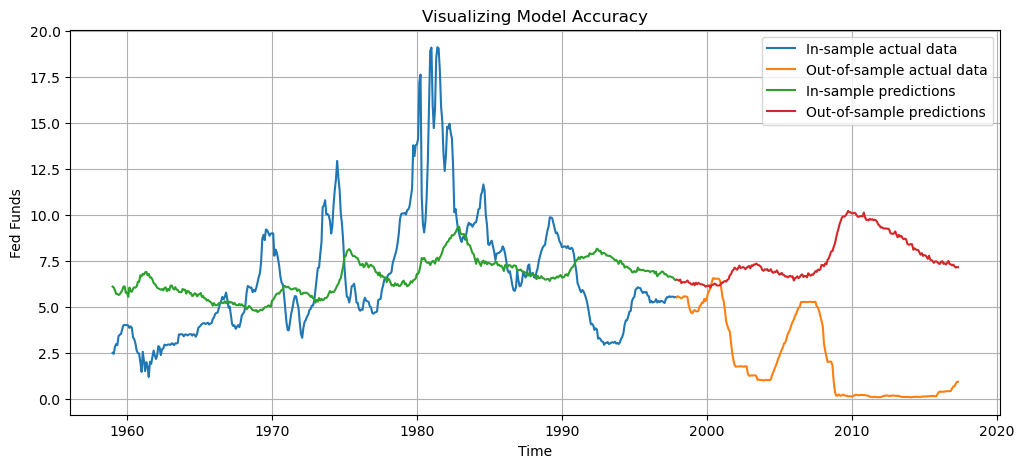

In [9]:
plt.figure(figsize = (12,5))
plt.plot(y_in)
plt.plot(y_out)
plt.plot(in_pred)
plt.plot(out_pred)
plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["In-sample actual data","Out-of-sample actual data","In-sample predictions","Out-of-sample predictions"])
plt.grid()
plt.show()

In [10]:
#Deriving Mean Squared Error using Scikit learn
in_mse_1 = mean_squared_error(y_in, in_pred)
out_mse_1 = mean_squared_error(y_out, out_pred)

## The in-sample and out-of-sample MSEs are: 

In [11]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566852


## Using a for-loop to generate different models at different polynomial degrees

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
max_degree = 3

The degree of the model is: 1


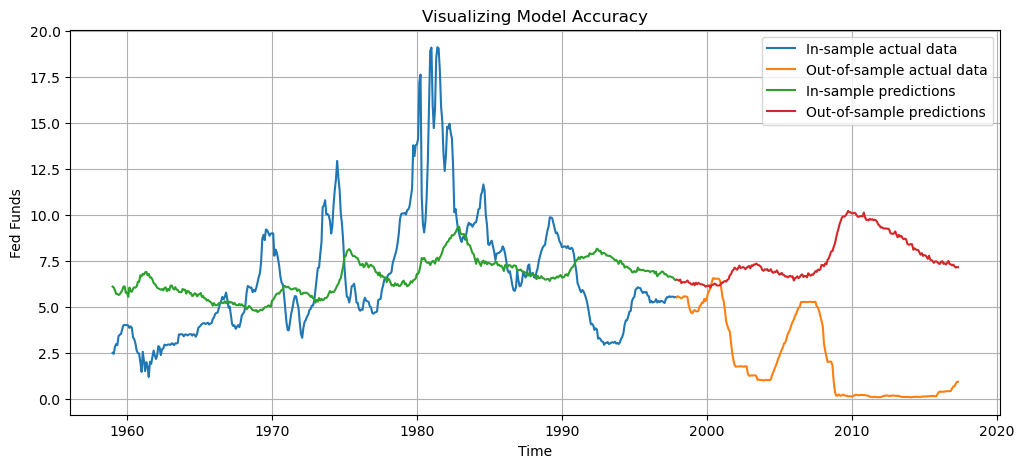

The degree of the model is: 2


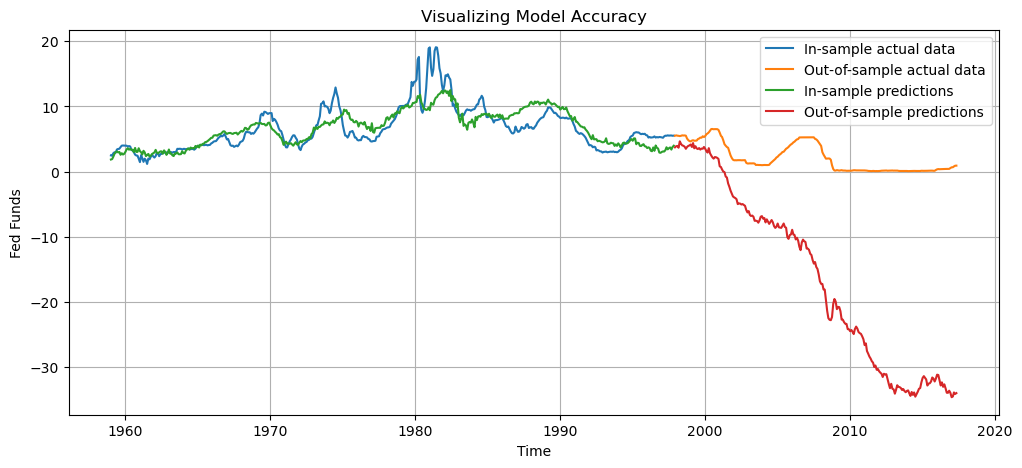

The degree of the model is: 3


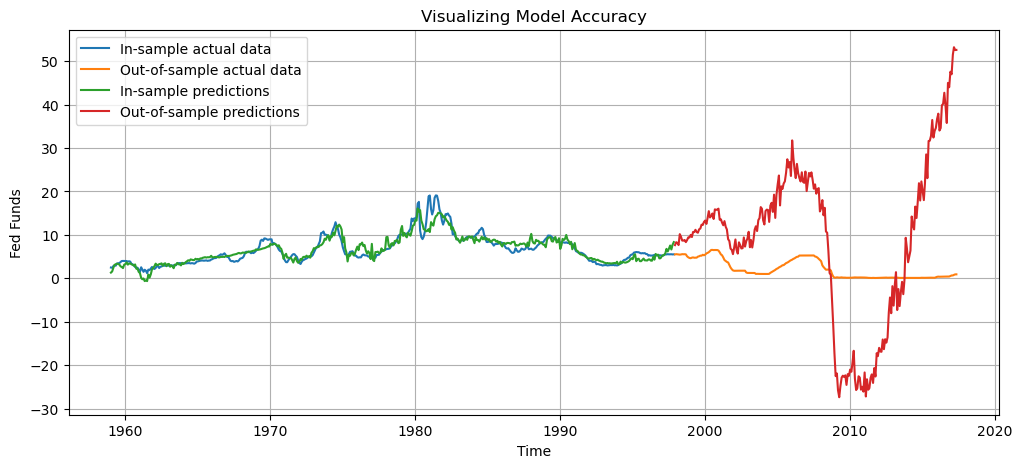

In [14]:
for degrees in range (1, 1+max_degree):
    print("The degree of the model is:", degrees) 
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    model1 = sm.OLS(y_in, X_in_poly).fit()
    in_pred = model1.fittedvalues
    in_pred = pd.DataFrame(in_pred, index = y_in.index)
    out_pred = model1.predict(X_out_poly)
    out_pred = pd.DataFrame(out_pred, index = y_out.index)
    plt.figure(figsize = (12,5))
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_pred)
    plt.plot(out_pred)
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In-sample actual data","Out-of-sample actual data","In-sample predictions","Out-of-sample predictions"])
    plt.grid()
    plt.show()    

## Observations

### On the basis of the above models, the bias-variance tradeoff is clearly illustrated in the form of models being able to fit closely to in-sample data, but showcasing poor performance in out-of-sample data. 

The initial model built using a single-degree polynomial is a classic case of underfitting. The model fails to explain most of the variation in the data, as the "fitted values" or the predictions made using the linear regression did not track closely with the actual in-sample values. With an adjusted r-square of 0.082, it is clear that the model is incapable of explaining the majority of the variance in the data. Visually, it also appears as a rather simple, linear expression rather than the highly volatile curve that is the real data. The in-sample MSE of the model is 10, which is higher than tolerance levels, raising concerns over its performance.

This behaviour of poor performance continues in the out-of-sample data, with the red line which represents the predictions very poorly tracking the actual data. In actuality, the model is unable to track the actual data. The MSE is 40, which is an alarmingly high level and again reflects the poor performance of the model. 

When we treat the problem with the model as one of "mis-specification", we use the for-loop to raise the model to higher polynomial degrees of 2 and 3. 
The results from the new models also do not inspire any confidence. Both these models appear to creep slowly toward the bias end of the bias-variance tradeoff spectrum, prioritising in-sample fit over out-of-sample performance. This results in wild predictions, particularly in case 3, where there is a clear indication that the model is very compromised in its ability to perform in "unseen data". 

Model 3 achieves high levels of in-sample fit, but it goes to underperform so poorly out-of-sample, that we can confidently label this case as "overfitting". Model 2

Overall